Modified National Institute of Standards and Technology
(MNIST)---computer vision dataset for handwritten digit ---- each image is 28 X 28 ---- train set contains 60000 images ---- test set contains 10000 images.


In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Using TensorFlow backend.


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
print(x_train[0])

print("the shape of the image is",x_train[0].shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# plotting the image for visualisation

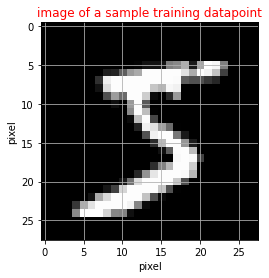

the label for the image is   5


In [ ]:
plt.imshow(x_train[0],cmap='gray')
plt.title("image of a sample training datapoint",color='red')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.grid(True)
plt.show()
print("the label for the image is  ",y_train[0])

visualizing some samples and the corresponding labels

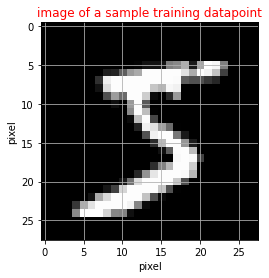

   the label for the image is   5


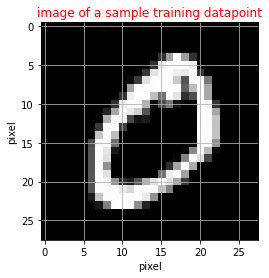

   the label for the image is   0


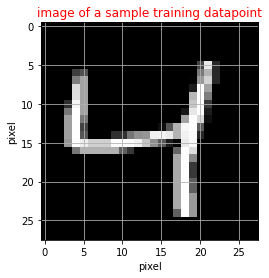

   the label for the image is   4


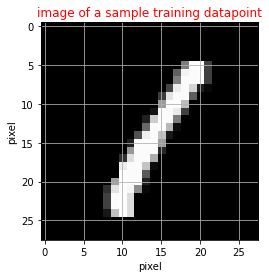

   the label for the image is   1


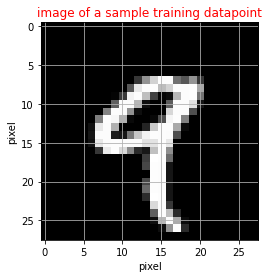

   the label for the image is   9


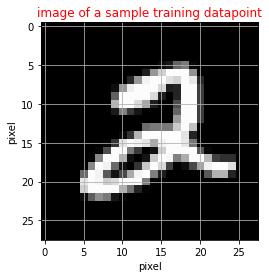

   the label for the image is   2


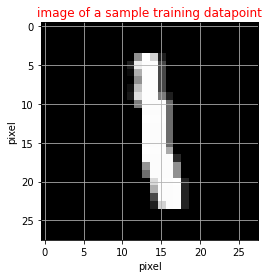

   the label for the image is   1


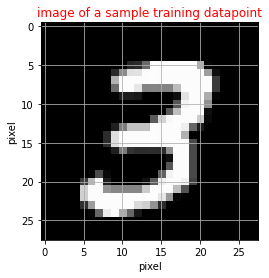

   the label for the image is   3


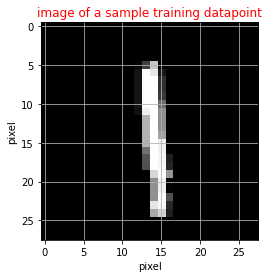

   the label for the image is   1


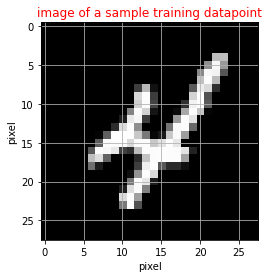

   the label for the image is   4


In [ ]:
for i in range(10):
  plt.imshow(x_train[i],cmap='gray')
  plt.title("image of a sample training datapoint",color='red')
  plt.xlabel("pixel")
  plt.ylabel("pixel")
  plt.grid(True)
  plt.show()
  print("   the label for the image is  ",y_train[i])

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
y_test1 = pd.get_dummies(y_test)
y_test1.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


In [ ]:
y_train1 = pd.get_dummies(y_train)
y_train1.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


## reshaping the image into (28,28,1)

In [ ]:
new_x_train = x_train.reshape((60000,28,28,1))
print("the shape of the train image is",new_x_train.shape)
new_x_test = x_test.reshape((10000,28,28,1))
print("the shape of the test image is",new_x_test.shape)
print("the shape of the single image is ",new_x_train[0].shape)

the shape of the train image is (60000, 28, 28, 1)
the shape of the test image is (10000, 28, 28, 1)
the shape of the single image is  (28, 28, 1)


CNN --- convolution ---- relu ---- pooling ---- fully connected layer --- ANN

In [ ]:
from keras.layers import Dense            # to add layers in ann or fully connected layer we use dense()
from keras.layers import Conv2D    # to add convolution layers
from keras.models import Sequential       # object of this class acts as the classifier and call all other  classes like dense,convolution 2d ,flatten, maxpooling for building the network
from keras.layers import Flatten          #before giving to ann
from keras.layers import MaxPooling2D     #for capturing spatial variance and compression 

In [ ]:
# initialising the cnn
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))  #first convolution layer
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Flatten())

adding ANN 

In [ ]:
classifier.add(Dense(units=128,kernel_initializer='uniform',activation='relu')) #first hidden layer

#output layer
classifier.add(Dense(units=10,activation='softmax')) #to get the probabilities of the classes ---- sigmoid limit the output between 0 and 1 --- doesnt represent as probabilities --- so softmax function is applied to get the required output --- every output sums to 1 now
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
new_x_train = new_x_train/255.0
new_x_test = new_x_test/255.0

In [ ]:
classifier.fit(new_x_train,y_train1,validation_data =(new_x_test,y_test1),epochs=10,batch_size=256)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 4s 70us/step - loss: 0.2922 - acc: 0.9214 - val_loss: 0.1116 - val_acc: 0.9687
Epoch 2/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0864 - acc: 0.9748 - val_loss: 0.0687 - val_acc: 0.9779
Epoch 3/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0581 - acc: 0.9826 - val_loss: 0.0548 - val_acc: 0.9806
Epoch 4/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0457 - acc: 0.9867 - val_loss: 0.0460 - val_acc: 0.9844
Epoch 5/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0349 - acc: 0.9898 - val_loss: 0.0446 - val_acc: 0.9844
Epoch 6/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0283 - acc: 0.9917 - val_loss: 0.0442 - val_acc: 0.9854
Epoch 7/10
60000/60000 [==

In [ ]:
scores = classifier.evaluate(new_x_test,y_test1,verbose=0)
print("scores : ",scores)

scores :  [0.04830906605737109, 0.9843]


In [ ]:
y_pred1 = classifier.predict_classes(new_x_test[0].reshape(1,28,28,1)) #7,2,1
print(y_pred1)
y_pred2 = classifier.predict_classes(new_x_test[1].reshape(1,28,28,1)) #7,2,1
print(y_pred2)
y_pred3 = classifier.predict_classes(new_x_test[2].reshape(1,28,28,1)) #7,2,1
print(y_pred3)

[7]
[2]
[1]


In [ ]:
import cv2
def predict(filename) :
  im = cv2.imread(filename,0)
  plt.imshow(im,cmap='gray')
  plt.title("image of a sample training datapoint",color='red')
  plt.xlabel("pixel")
  plt.ylabel("pixel")
  #plt.grid(True)
  plt.show()
  print("the shape of the sample image is ",im.shape)
  img = cv2.resize(im,(28,28))
  plt.imshow(img, cmap='gray')
  plt.show()
  y_pred = classifier.predict_classes(img.reshape(1,28,28,1))
  print("the predicted digit in the image is ",y_pred)

processing the sample test images---size conversion (28,28,1)

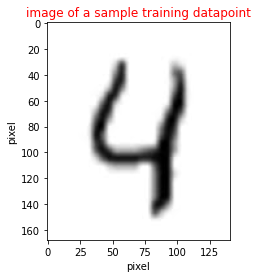

the shape of the sample image is  (168, 141)


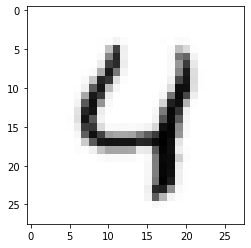

the predicted digit in the image is  [3]


In [ ]:
predict('/content/drive/My Drive/Colab Notebooks/sample_4.jfif')

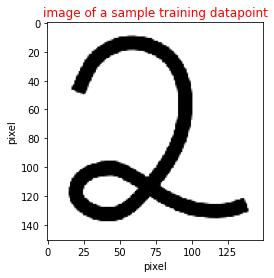

the shape of the sample image is  (151, 150)


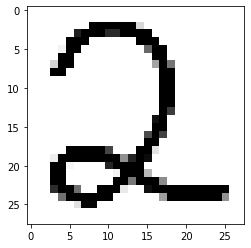

the predicted digit in the image is  [2]


In [ ]:
predict('/content/drive/My Drive/Colab Notebooks/sample_2.jpeg')

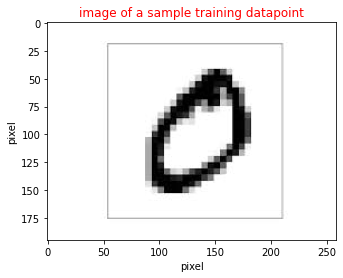

the shape of the sample image is  (195, 259)


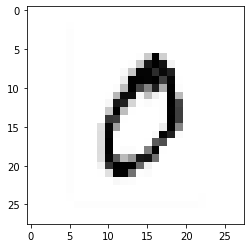

the predicted digit in the image is  [8]


In [ ]:
predict('/content/drive/My Drive/Colab Notebooks/sample_0.jpeg')